In [1]:
#install these if it's not there on your pc
#pip install numpy pandas scikit-learn seaborn 

In [106]:
#importing libraries for playing with the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
#reading the dataset
mobile_data=pd.read_csv('mobile_price_range_data.csv')

In [108]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [109]:
#size of the dataset
mobile_data.shape
# 2000 entries, 21 variables

(2000, 21)

In [110]:
#checking if there are any null values
mobile_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [111]:
#split the dataset into training and test datasets with 70% of the data for training the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mobile_data.drop('price_range',axis=1), mobile_data['price_range'], test_size=0.30, random_state=1)

In [112]:
X_train.shape

(1400, 20)

In [113]:
X_test.shape

(600, 20)

In [114]:
y_train.shape

(1400,)

In [115]:
y_test.shape

(600,)

In [116]:
#import performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### (a) Logistic Regression

In [117]:
#import linear regression algorithm
from sklearn.linear_model import LinearRegression

#creating an instance of the model
lm=LinearRegression()

#fitting the model
lm.fit(X_train,y_train)

#predicting the values
predictions_linreg=lm.predict(X_test)

In [118]:
# confusion matrix
print(confusion_matrix(y_test,predictions_linreg.round()))


[[  0   0   0   0   0   0]
 [ 10 112  13   0   0   0]
 [  0   0 146   3   0   0]
 [  0   0  14 153   1   0]
 [  0   0   0  27 113   8]
 [  0   0   0   0   0   0]]


In [119]:
# classification report
print(classification_report(y_test,predictions_linreg.round()))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       1.00      0.83      0.91       135
         1.0       0.84      0.98      0.91       149
         2.0       0.84      0.91      0.87       168
         3.0       0.99      0.76      0.86       148
         4.0       0.00      0.00      0.00         0

    accuracy                           0.87       600
   macro avg       0.61      0.58      0.59       600
weighted avg       0.91      0.87      0.89       600



c:\Users\nived\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nived\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nived\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### (b) KNN Classification

In [120]:
#import KNN from sklearn
from sklearn.neighbors import KNeighborsClassifier

#creating an instance of the model
knn=KNeighborsClassifier()

#fitting the model
knn.fit(X_train,y_train)

#predicting the values
predictions_knn=knn.predict(X_test)

In [121]:
# confusion matrix
print(confusion_matrix(y_test,predictions_knn))

[[132   3   0   0]
 [  5 136   8   0]
 [  0  11 149   8]
 [  0   0  13 135]]


In [122]:
# classification report
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.91      0.91      0.91       149
           2       0.88      0.89      0.88       168
           3       0.94      0.91      0.93       148

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



### (c) SVM Classifier with linear and rbf kernel

In [123]:
#importing SVMC 
from sklearn.svm import SVC

#creating an instance of the model with linear and rbf kernel
svc_lin=SVC(kernel='linear')
svc_rbf=SVC(kernel='rbf')

#fitting the model
svc_lin.fit(X_train,y_train)
svc_rbf.fit(X_train,y_train)

#predicting the values
predictions_svc_lin=svc_lin.predict(X_test)
predictions_svc_rbf=svc_rbf.predict(X_test)

In [124]:
# confusion matrix
print(confusion_matrix(y_test,predictions_svc_lin))

[[133   2   0   0]
 [  2 144   3   0]
 [  0   6 157   5]
 [  0   0   3 145]]


In [125]:
# classification report
print(classification_report(y_test,predictions_svc_lin))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       135
           1       0.95      0.97      0.96       149
           2       0.96      0.93      0.95       168
           3       0.97      0.98      0.97       148

    accuracy                           0.96       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.96      0.96       600



### (d) Decision Tree Classifier

In [126]:
#importing decision tree
from sklearn.tree import DecisionTreeClassifier

#creating an instance of the model
dtree=DecisionTreeClassifier()

#fitting the model
dtree.fit(X_train,y_train)

#predicting the values
predictions_dtree=dtree.predict(X_test)

In [127]:
# confusion matrix
print(confusion_matrix(y_test,predictions_dtree))

[[118  17   0   0]
 [ 12 127  10   0]
 [  0  19 134  15]
 [  0   0  12 136]]


In [128]:
# classification report
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       135
           1       0.78      0.85      0.81       149
           2       0.86      0.80      0.83       168
           3       0.90      0.92      0.91       148

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



### (e) Random Forest Classifier

In [129]:
#importing random forest
from sklearn.ensemble import RandomForestClassifier

#creating an instance of the model
rfc=RandomForestClassifier()

#fitting the model
rfc.fit(X_train,y_train)

#predicting the values
predictions_rfc=rfc.predict(X_test)

In [130]:
# confusion matrix
print(confusion_matrix(y_test,predictions_rfc))

[[125  10   0   0]
 [ 15 119  15   0]
 [  0  20 138  10]
 [  0   0  14 134]]


In [131]:
# classification report
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       135
           1       0.80      0.80      0.80       149
           2       0.83      0.82      0.82       168
           3       0.93      0.91      0.92       148

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



In [132]:
#accuracy score dict
accuracy_score_dict={'Linear Regression':accuracy_score(y_test,predictions_linreg.round()),
                        'KNN':accuracy_score(y_test,predictions_knn),
                        'SVC Linear':accuracy_score(y_test,predictions_svc_lin),
                        'SVC RBF':accuracy_score(y_test,predictions_svc_rbf),
                        'Decision Tree':accuracy_score(y_test,predictions_dtree),
                        'Random Forest':accuracy_score(y_test,predictions_rfc)}



In [133]:
accuracy_score_dict = dict(sorted(accuracy_score_dict.items(),key=lambda x:x[1]))

In [134]:
max(accuracy_score_dict.values())

0.965

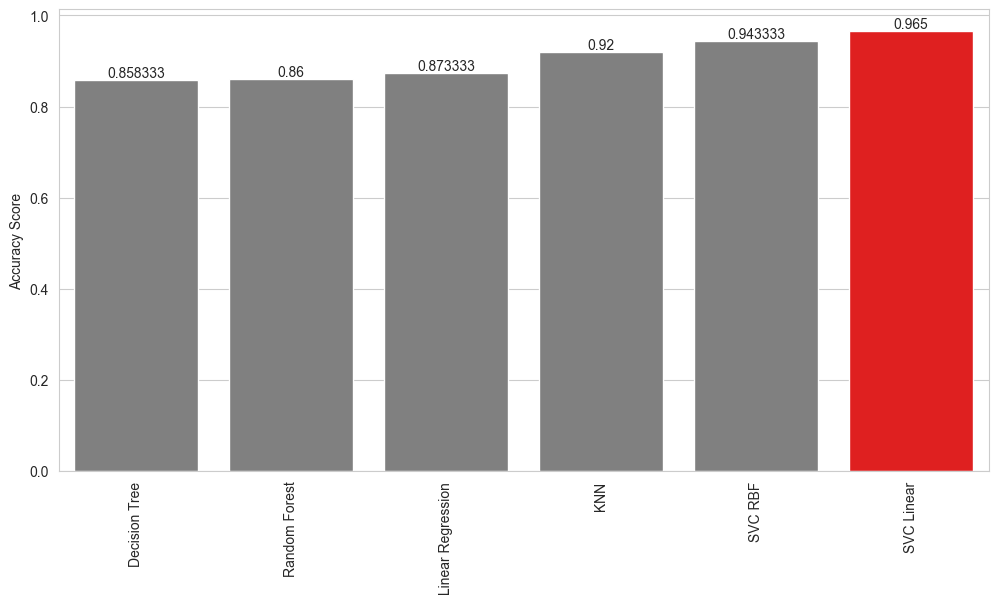

In [135]:
#plotting the accuracy scores
plt.figure(figsize=(12,6))
palette = ['red' if val==max(accuracy_score_dict.values()) else 'gray' for val in accuracy_score_dict.values()]
sns.barplot(x=list(accuracy_score_dict.keys()),y=list(accuracy_score_dict.values()),palette=palette)
plt.xticks(rotation=90)
plt.ylabel('Accuracy Score')
plt.bar_label(plt.gca().containers[0])
plt.show()